In [57]:
print("Hello World")
#TASKS
#implement algorithms
#plotting
#markdown texts and explanation
#errors?
#extras for A

Hello World

<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 21pt; margin-bottom: 0.3em;"><b> Computational Task 1: Root-Finding</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Kyle Aaron Coloma</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Jason Harvey Lorenzo</div>

## Error Analysis

In [120]:
#Function that computes error and tabulizes x, f(x), approximate error, and true error (if true root is available) per iteration
using DataFrames

function tabulize(x_values,y_values,trueroot=nothing)
    iterations = length(x_values)
    approx_errors = Float64[NaN]
    true_errors=Float64[]
    ea=0.
    i=2

    while i<iterations+1
        ea = abs((x_values[i]-x_values[i-1])/x_values[i])*100
        push!(approx_errors, ea)
        i+=1
    end

    if trueroot==nothing
        df = DataFrame(x=x_values, f_x=y_values, Approximate_error = approx_errors)
    else
        et=0.
        i=1
        while i<iterations
            et = abs((trueroot - x_values[i])/trueroot)*100
            push!(true_errors, ea)
            i+=1
        end
        df = DataFrame(x=x_values, f_x=y_values, Approximate_error = approx_errors, True_error = true_errors)
    end
    return df
end

tabulize (generic function with 2 methods)

## Fixed-Point Iteration

In [121]:
## Fixed-Point Iteration Function
#Fixed-Point Iteration function
function fixedpt(g::Function,pzero,eps,N)
    n=1
    x=0.
    x_values = Float64[pzero]
    while n<N
        pone=g(pzero)
        if abs(pone-pzero)<eps
            push!(x_values, pone)
            println("x is $pone and the iteration number is $n")
            return x_values
        end
        push!(x_values, pone)
        pzero=pone
        n=n+1
    end
    println("Did not converge. The last estimate is p=$pzero.")
    return x_values
end

fixedpt (generic function with 1 method)

In [174]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
f3(x) = x^3-2*x^2-1
g(x)=(2*x^2+1)^(1/3.)
pzero = 1
tol3 = 10^(-4.)
N3 = 30

#Plotting-related
max_x3 = 2.2
min_x3 = 0.9
length_x3 = 1000
max_y3 = 2.5
min_y3 = -2.5

x_values3=Float64[]
x_values3=fixedpt(g,pzero,tol3,N3);

x is 2.205472095330031 and the iteration number is 19


In [172]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values3=Float64[]

for x in x_values3
    push!(y_values3, f3(x))
end

tabulize(x_values3, y_values3)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,1.0,-2.0,NaN
2,1.44225,-2.16017,30.6639
3,1.72804,-1.8121,16.5386
4,1.9104,-1.327,9.54555
5,2.02463,-0.89902,5.64214
6,2.09525,-0.58185,3.37023
7,2.13853,-0.366468,2.02378
8,2.16491,-0.227083,1.2187
9,2.18094,-0.13934,0.735065


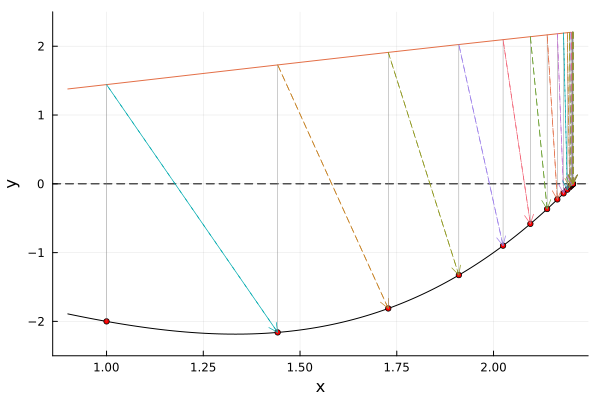

In [188]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size3=length(x_values3)
y_zeros3 = zeros(array_size3)

x = range(min_x3, max_x3, length=length_x3)
y = f3.(x)
y1= g.(x)

Plots.plot(x, y, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", color=:black, label="f(x)") #Plots f(x)
plot!(x, y1, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", label="g(x)") #Plots g(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values3, y_values3, label="Iteration Points", markersize=3, markercolor=:red)

i=1
while i<array_size3
    plot!([x_values3[i],x_values3[i]], [y_values3[i],g(x_values3[i])], label=false, linestyle=:solid, linewidth=0.4,color=:gray)
    quiver!([x_values3[i]], [g(x_values3[i])], quiver=([(x_values3[i+1] - x_values3[i])], [y_values3[i+1]-g(x_values3[i])]),label=false, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)
    i+=1
end

current()

## Bisection Method

In [124]:
## Bisection Method Function

function bisection(f::Function, a, b, eps, N)
    n = 1
    p = 0.0 

    p_values = Float64[]

    while n <= N
        p = a + (b - a) / 2
        push!(p_values, p)

        if f(p) == 0 || abs(a - b) < eps
            println("x is $p and the iteration number is $n")
            return p_values
        end

        if f(a) * f(p) < 0
            b = p
        else
            a = p
        end
        n += 1
    end

    y = f(p)
    println("Method did not converge. The last iteration gives $p with function value $y")
    return p_values
end

bisection (generic function with 1 method)

In [125]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
f4(x) = x^5+2x^3-5x-2
a = 0
b = 2
tol4 = 10^(-4.)
N4 = 20

#Plotting-related
max_x4 = 0.9
min_x4 = 1.6
length_x4 = 1000
max_y4 = 5
min_y4 = -5

x_values4=Float64[]
x_values4=bisection(f4,a,b,tol3,N4);

x is 1.319671630859375 and the iteration number is 16


In [126]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values4=Float64[]

for x in x_values4
    push!(y_values4, f4(x))
end

tabulize(x_values4, y_values4)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,1.0,-4.0,NaN
2,1.5,4.84375,33.3333
3,1.25,-1.29199,20.0
4,1.375,1.23911,9.09091
5,1.3125,-0.145625,4.7619
6,1.34375,0.515165,2.32558
7,1.32812,0.177105,1.17647
8,1.32031,0.0138514,0.591716
9,1.31641,-0.0663554,0.296736


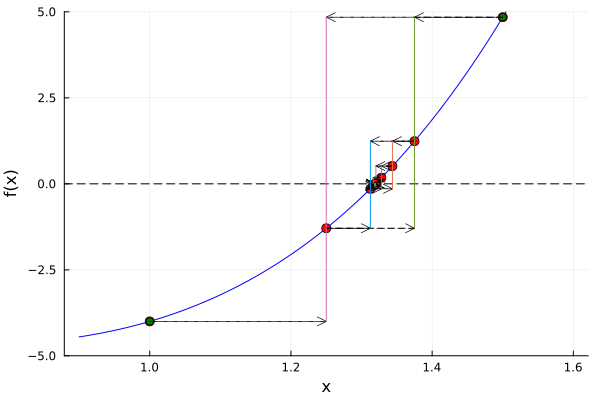

In [154]:
using Plots
f4(x)= (x)^5+2(x)^3-5(x)-2

array_size4=length(x_values4)
y_zeros4 = zeros(array_size4)

x = range(min_x4, max_x4, length=length_x4)
y = f4.(x)

Plots.plot(x, y, ylims=(min_y4, max_y4), color=:blue, legend=false, grid=true, xlabel="x", ylabel="f(x)") #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values4, y_values4, label="Iteration Points", markersize=5, markercolor=:red)
scatter!([x_values4[1],x_values4[2]], [y_values4[1],y_values4[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

i=3
while i<array_size4
    quiver!([x_values4[i-2]], [y_values4[i-2]], quiver=([(x_values4[i] - x_values4[i-2])], [0]),label=false, color=:black, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)
    quiver!([x_values4[i-1]], [y_values4[i-1]], quiver=([(x_values4[i] - x_values4[i-1])], [0]),label=false, color=:black, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)

    i+=1
end

i=3
while i<array_size4
    plot!([x_values4[i],x_values4[i]], [y_values4[i-2],y_values4[i-1]], label=false, linestyle=:solid, linewidth=1)
    i+=1
end

current()

## Newton-Raphson Method

In [128]:
#Newton-Raphson method function
function newtonRaphson(f::Function,fprime::Function,xin,tol,N)
    n=1
    x=0.
    x_values = Float64[xin]
    while n<=N
        x=xin-f(xin)/fprime(xin)
        if f(x)==0 || abs(x-xin)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xin=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with
        function value $y")
    return x_values
end




newtonRaphson (generic function with 1 method)

In [129]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f(x) = x.^5 + 2*x.^3 - 5*x .- 2
fprime(x) = 5x.^4+6x.^2-5
xin = 1
tol = 10^(-4.)
N = 20

#Plotting-related
max_x = 1.7
min_x = 0.9
length_x = 1000
max_y = 14
min_y = -5

x_values=Float64[]
x_values=newtonRaphson(f,fprime,xin,tol,N);

x is 1.3196411672093729 and the iteration number is 6


In [130]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values=Float64[]

for x in x_values
    push!(y_values, f(x))
end

tabulize(x_values, y_values)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,1.0,-4.0,NaN
2,1.66667,11.786,40.0
3,1.4321,2.7376,16.3788
4,1.3355,0.334647,7.23392
5,1.32001,0.00756275,1.17334
6,1.31964,4.15247e-6,0.0277732


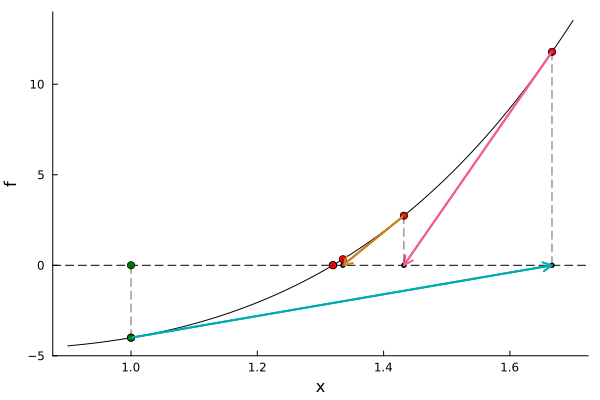

In [195]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size=length(x_values)
y_zeros = zeros(array_size)

x = range(min_x, max_x, length=length_x)
y = f.(x)

Plots.plot(x, y, ylims=(min_y, max_y), legend=false, grid=false, xlabel="x", ylabel="f", color=:black) #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values, y_zeros, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
scatter!(x_values, y_values, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
scatter!([x_values[1],x_values[1]], [y_values[1],0], label=false, color=:green, markersize=4) #Marks initial guess x0 as green

# for x_point in x_values #Iterates to draw each tangent line for every x passed by
#     alpha = opacity_control/array_size
#     tangent_line(x) = fprime(x_point) * (x - x_point) + f(x_point)
#     plot!(x, tangent_line, label=false, linestyle=:solid, color=:red, alpha=alpha)
# end

i=2
while i<array_size2
    quiver!([x_values[i-1]], [y_values[i-1]], quiver=([(x_values[i] - x_values[i-1])], [-y_values[i-1]]),label=false, linewidth=2, legend=false, arrow=true, linestyle=:solid)
    i+=1
end

for x_point in x_values #Iterates to draw each line from (x,f(x)) to (x,0)
    plot!([x_point, x_point], [f(x_point), 0], label=nothing, linestyle=:dash, color=:black,alpha=0.6)
end

current()



Note increasing opacity and increasing slope as it converges

## Secant Method

In [132]:
#Secant method function

function secant(f::Function,xzero,xone,tol,N)
    n=1
    x=0.
    x_values = Float64[xzero,xone]
    while n<=N
        x=xone-f(xone)*(xone-xzero)/(f(xone)-f(xzero))
        if f(x)==0 || abs(x-xone)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xzero=xone
        xone=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives xone with
        function value $y")
    return x_values
end


secant (generic function with 1 method)

In [133]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f2(x) = cos(x)-x
xzero = 0.43
xone = 1
tol2 = 10^(-4.)
N2 = 20

#Plotting-related
max_x2 = 1.1
min_x2 = 0.32
length_x2 = 1000
max_y2 = 0.5
min_y2 = -0.5

x_values2=Float64[]
x_values2=secant(f2,xzero,xone,tol2,N2);

x is 0.7390851324504771 and the iteration number is 4


In [134]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values2=Float64[]

for x in x_values2
    push!(y_values2, f2(x))
end

tabulize(x_values2, y_values2)

Row,x,f_x,Approximate_error
,Float64,Float64,Float64
1,0.43,0.478966,NaN
2,1.0,-0.459698,57.0
3,0.72085,0.0303946,38.7251
4,0.738163,0.0015437,2.34533
5,0.739089,-6.27946e-6,0.125332


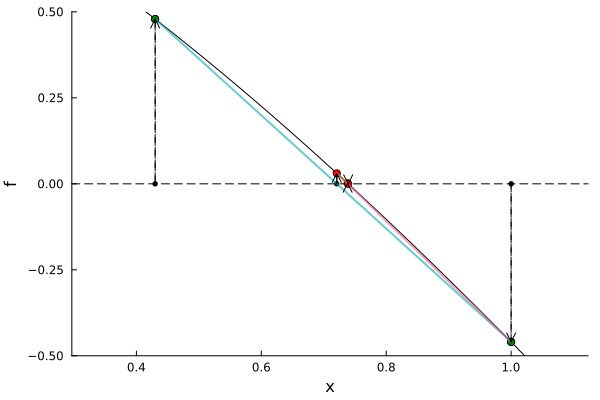

In [201]:
#plotting the given f(x) and visualization of root-finding

using Plots

array_size2=length(x_values2)
y_zeros2 = zeros(array_size2)

x2 = range(min_x2, max_x2, length=length_x2)
y2 = f2.(x2)


Plots.plot(x2, y2, ylims=(min_y2, max_y2), legend=false, grid=false, xlabel="x", ylabel="f", color=:black) #Plots f(x)
hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

scatter!(x_values2, y_zeros2, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
scatter!(x_values2, y_values2, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
scatter!([x_values2[1],x_values2[2]], [y_values2[1],y_values2[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

i=2
while i<array_size2
    # secant_line(x) = ((f2(x_values2[i])-f2(x_values2[i-1]))/(x_values2[i]-x_values2[i-1])) * (x - x_values2[i-1]) + f2(x_values2[i-1])
    # plot!(x2, secant_line, label=false, linestyle=:dash, color=:red, alpha=alpha)
    plot!([x_values2[i],x_values2[i-1]], [y_values2[i],y_values2[i-1]], label=false, linestyle=:solid, linewidth=2,alpha=0.6)
    i+=1
end

for x_point in x_values2 #Iterates to draw each line from (x,f(x)) to (x,0)
    quiver!([x_point], [0], quiver=([0], [f2(x_point)]),label=false, color=:black, linewidth=1, legend=false, arrow=true, linestyle=:dash)
end

current()